In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

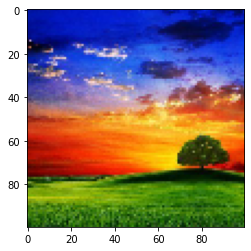

In [2]:
inputImg = plt.imread('CroppedResizedImage.png')[:,:,:3]
plt.imshow(inputImg)
plt.show()

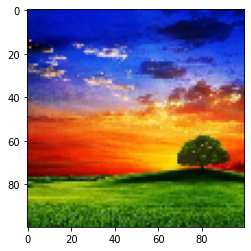

In [3]:
RGBIMag = inputImg.copy()
RGBIMag = RGBIMag*255.0
RGBIMag = RGBIMag.astype(np.uint8)

plt.imshow(RGBIMag)
plt.show()

# Conversion using cv2

(100, 100, 3)
(100, 100) (100, 100) (100, 100)


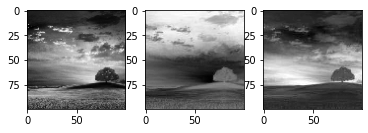

In [4]:
YUV444usingCV2 = cv2.cvtColor(RGBIMag, cv2.COLOR_RGB2YUV)
print(YUV444usingCV2.shape)
Y444usingCV2 = YUV444usingCV2[:,:,0]
U444usingCV2 = YUV444usingCV2[:,:,1]
V444usingCV2 = YUV444usingCV2[:,:,2]
print(Y444usingCV2.shape, U444usingCV2.shape, V444usingCV2.shape)

fig, axs = plt.subplots(1,3)

axs[0].imshow(Y444usingCV2, cmap='gray')
axs[1].imshow(U444usingCV2, cmap='gray')
axs[2].imshow(V444usingCV2, cmap='gray')

plt.show()

In [18]:
Y444usingCV2.max(), Y444usingCV2.min()

(239, 4)

In [5]:
print(Y444usingCV2[:5,:5], U444usingCV2[:5,:5], V444usingCV2[:5,:5], sep='\n')

[[32 33 28 29 29]
 [30 30 30 32 31]
 [32 33 33 33 33]
 [32 33 31 32 33]
 [33 31 35 31 30]]
[[190 190 190 190 192]
 [191 191 193 195 194]
 [193 194 196 198 195]
 [196 195 195 195 197]
 [194 194 194 193 196]]
[[104 103 104 104 104]
 [102 102 102 101 101]
 [100  99  99  99  99]
 [101 101 101 101 101]
 [ 99 101 101 103 103]]


255 0 5176


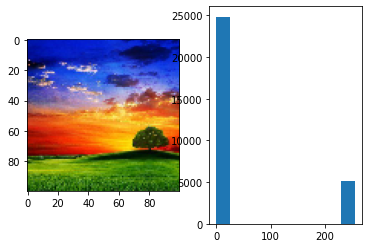

In [19]:
RGBoutFromCV2 = cv2.cvtColor(YUV444usingCV2, cv2.COLOR_YUV2RGB)


err = (RGBoutFromCV2 - RGBIMag)
print(np.max(err), np.min(err), np.sum(err>100))

fig, axs = plt.subplots(1, 2)

axs[0].imshow(RGBoutFromCV2/255.0)
axs[1].hist(err.flatten())
plt.show()

# conversion using Formula's

In [7]:
def RGBtoYUV444(Rin, Gin, Bin):
    Yout = 0.299*Rin + 0.587*Gin + 0.114*Bin
    Uout = -0.147*Rin - 0.289*Gin + 0.436*Bin
    Vout = 0.615*Rin - 0.515*Gin - 0.1*Bin
    return {'Y' : Yout, 'U' : Uout, 'V' : Vout}

In [8]:
def YUV444toRGB(Yin, Uin, Vin):
    Rout = Yin + 1.13983*Vin
    Gout = Yin - 0.39465*Uin - 0.5806*Vin
    Bout = Yin + 2.03211*Uin
    return {'R' : Rout, 'G' : Gout, 'B' : Bout}

In [9]:
YUV444fromFormula = np.zeros((YUV444usingCV2.shape))
Y444fromFormula = np.zeros((Y444usingCV2.shape))
U444fromFormula = np.zeros((U444usingCV2.shape))
V444fromFormula = np.zeros((V444usingCV2.shape))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        YUVfrom444 = RGBtoYUV444(RGBIMag[i,j,0], RGBIMag[i,j,1], RGBIMag[i,j,2])
        Y444fromFormula[i,j] = YUVfrom444['Y']
        U444fromFormula[i,j] = YUVfrom444['U']
        V444fromFormula[i,j] = YUVfrom444['V']
        YUV444fromFormula[i,j, :] = np.asarray([YUVfrom444['Y'], YUVfrom444['U'], YUVfrom444['V']])


239.045 4.235
0.5019999999999953 0.0 0


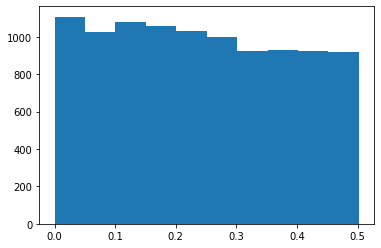

In [10]:
print(Y444fromFormula.max(), Y444fromFormula.min())

err = abs(Y444fromFormula - Y444usingCV2)
print(err.max(), err.min(), np.sum(err>100))
plt.hist(err.flatten())
plt.show()

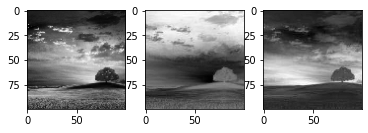

In [11]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(Y444fromFormula, cmap='gray')
axs[1].imshow(U444fromFormula, cmap='gray')
axs[2].imshow(V444fromFormula, cmap='gray')

plt.show()

In [12]:
RGBfromFormula = np.zeros((RGBoutFromCV2.shape))
RfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))
GfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))
BfromFormula = np.zeros((RGBoutFromCV2.shape[0], RGBoutFromCV2.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        RGBfrom = YUV444toRGB(YUV444fromFormula[i,j, 0], YUV444fromFormula[i,j, 1], YUV444fromFormula[i,j, 2])
        RfromFormula[i,j] = RGBfrom['R']
        GfromFormula[i,j] = RGBfrom['G']
        BfromFormula[i,j] = RGBfrom['B']        

In [13]:
RGBfromFormula[:,:, 0] = RfromFormula
RGBfromFormula[:,:, 1] = GfromFormula
RGBfromFormula[:,:, 2] = BfromFormula

RGBfromFormula =RGBfromFormula

In [14]:
RGBfromFormula.max(), RGBfromFormula.min()

(255.00044579999994, -0.021822499999998968)

In [15]:
RGBfromFormula[RGBfromFormula<0] = 0
RGBfromFormula[RGBfromFormula>255] = 255

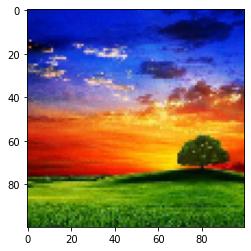

In [16]:
plt.imshow(RGBfromFormula/255.0)
plt.show()

0.05988501999999585 0.0 0


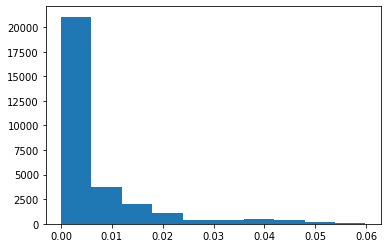

In [17]:
err = abs(RGBfromFormula - RGBIMag)
print(err.max(), err.min(), np.sum(err>100))
plt.hist(err.flatten())
plt.show()

0.05988501999999585